<a href="https://colab.research.google.com/github/DaniilSysoev/opisis_sem_4/blob/main/%D0%9E%D0%BF%D0%B8%D1%81%D0%B8%D1%81_%D1%81%D0%B5%D0%BC_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Фильтрация сигналов. Понятие идеального фильтра. Реализация с использованием преобразования Фурье.</h1>

<h2>Задание: При помощи модели фильтра, построенной на основе прямого и обратного преобразования Фурье, получить сигналы и их спектры после прохождения сигнала через ФНЧ, ПФ и ФВЧ с выделением по одной гармонической составляющей исходного сигнала.</h2>

<h3>Введем необходимые для рассчетов библиотеки</h3>

In [151]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

<h3>Добавим функцию построения сигнала</h3>

In [152]:
def signal(x):
    return 1 + np.sin(2.0*pi*x) + 2.0 * np.cos(4.0*pi*x) + 0.5 * np.cos(6.0*pi*x)

<h3>Добавим функцию фильтра</h3>

In [153]:
def filter(time, signal, fl, fh):
    n = len(signal)
    freq = np.fft.fftfreq(n, time[1]-time[0])
    spectr = np.fft.fft(signal)
    for i in range(n):
        if not fl <= abs(freq[i]) <= fh:
            spectr[i] *= 0+0j
    return np.fft.ifft(spectr)

<h3>Введем необходимые переменные, для вычисления сигнала</h3>

<h4>Входыне данные</h4>
<h5>Частота 1-ой гармоники сигнала: 10<br>Временной интервал: 5<br>Число временных отсчетов: 1000000</h5>

In [154]:
f = float(input('Частота 1-ой гармоники сигнала '))
T = float(input('Временной интервал '))
n = int(input('Число временных отсчетов '))

Частота 1-ой гармоники сигнала 10
Временной интервал 5
Число временных отсчетов 1000000


<h3>Построим временную шкалу и сигнал по ней</h3>

In [155]:
t = np.linspace(0, T, n)
u = signal(f*t)

<h3>Произведем рассчет БПФ и введем частотную шкалу</h3>

In [156]:
spec = np.fft.fft(u)
freq = np.fft.fftfreq(n, T/n)

<h3>Произведем рассчет для фильтра низких частот, полосного фильтра и фильтра высоких частот</h3>

In [157]:
print('Расчет ФНЧ...')
sig_lf = filter(t, u, 0.5*f, 1.5*f)
print('Расчет ПФ...')
sig_pb = filter(t, u, 1.5*f, 2.5*f)
print('Расчет ФВЧ...')
sig_hf = filter(t, u, 2.5*f, 4*f)

Расчет ФНЧ...
Расчет ПФ...
Расчет ФВЧ...


<h3>Произведем рассчет БПФ для полученных сигналов, прошедших через фильтр</h3>

In [158]:
spec_lf = np.fft.fft(sig_lf)
spec_pb = np.fft.fft(sig_pb)
spec_hf = np.fft.fft(sig_hf)

<h3>Построим модель исходного сигнала</h3>

(0.0, 0.1)

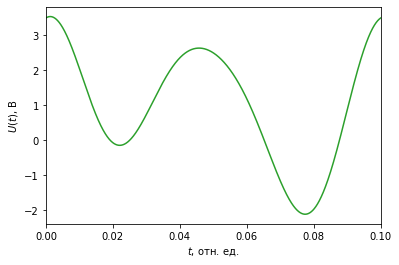

In [159]:
fig, ax = plt.subplots()
ax.plot(t, u, color='tab:green')
ax.set_xlabel("$t$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)
ax.set_xlim(0, 1/f)

<h3>Построим спектр заданного сигнала</h3>

(-1.0, 40.0)

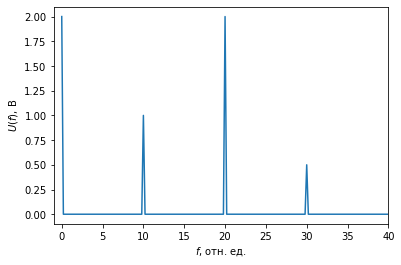

In [160]:
fig, ax = plt.subplots()
ax.plot(freq[0:n//2], (np.hypot(spec.real, spec.imag)/n*2.0)[0:n//2])
ax.set_xlabel("$f$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.set_xlim(-0.1*f, 4*f)

<h3>Построим модели сигнала, прошедшего через каждый фильтр</h3>

<h4>Фильтр низких частот</h4>

(0.0, 0.1)

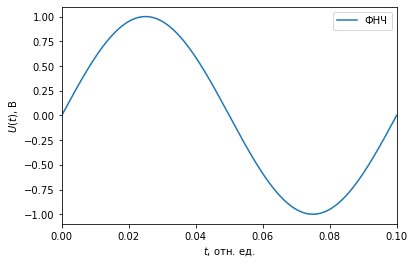

In [161]:
fig, ax = plt.subplots()
ax.plot(t, sig_lf.real, label='ФНЧ')
ax.set_xlabel("$t$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)
ax.legend(loc='best')
ax.set_xlim(0, 1/f)

<h4>Полосный фильтр</h4>

(0.0, 0.1)

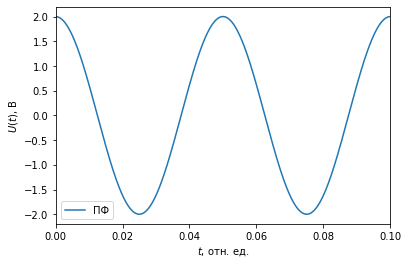

In [162]:
fig, ax = plt.subplots()
ax.plot(t, sig_pb.real, label='ПФ')
ax.set_xlabel("$t$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)
ax.legend(loc='best')
ax.set_xlim(0, 1/f)


<h4>Фильтр высоких частот</h4>

(0.0, 0.1)

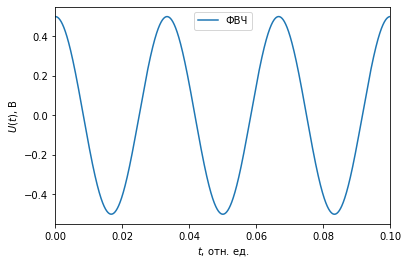

In [163]:
fig, ax = plt.subplots()
ax.plot(t, sig_hf.real, label='ФВЧ')
ax.set_xlabel("$t$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)
ax.legend(loc='best')
ax.set_xlim(0, 1/f)


<h3>Как мы видим, пройдя через каждый фильтр у нас осталась соответствующая частотная составляющая. Поэтому сигнал имеет вид синусоиды с определенной частотой, которую фильтр пропустил</h3>

<h3>Построим спектры для каждого фильтра</h3>

<h4>Фильтр низких частот</h4>

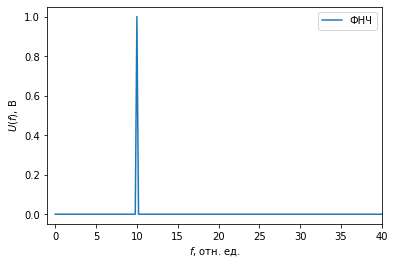

In [164]:
fig, ax = plt.subplots()
ax.plot(freq[0:n//2], (np.hypot(spec_lf.real, spec_lf.imag)/n*2.0)[0:n//2], label='ФНЧ')
ax.set_xlabel("$f$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.set_xlim(-0.1*f, 4*f)
ax.legend(loc='best')

<h4>Полосный фильтр</h4>

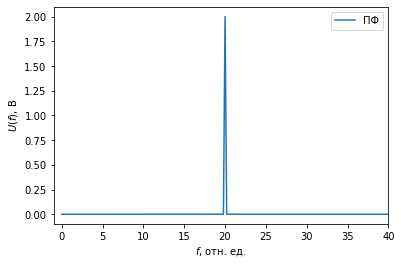

In [165]:
fig, ax = plt.subplots()
ax.plot(freq[0:n//2], (np.hypot(spec_pb.real, spec_pb.imag)/n*2.0)[0:n//2], label='ПФ')
ax.set_xlabel("$f$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.set_xlim(-0.1*f, 4*f)
ax.legend(loc='best')

<h4>Фильтр высоких частот</h4>

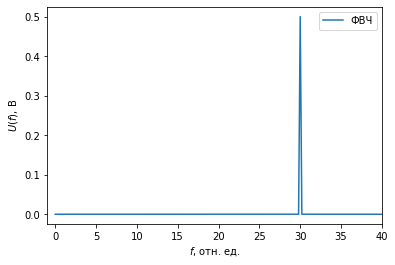

In [166]:
fig, ax = plt.subplots()
ax.plot(freq[0:n//2], (np.hypot(spec_hf.real, spec_hf.imag)/n*2.0)[0:n//2], label='ФВЧ')
ax.set_xlabel("$f$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.set_xlim(-0.1*f, 4*f)
ax.legend(loc='best')

<h2>Дополнительное задание: Построить графики одиночного видеосигнала после прохождения через ФНЧ с верхней граничной частотой, соответствующей 3 первым лепесткам, 1 главному лепестку и 0.5 главного лепестка спектра исходного прямоугольного импульса, а также при прохождении ФВЧ с нижней граничной частотой, равной частоте 0,5 главного лепестка спектра исходного сигнала.</h2>

<h3>Напишем функцию для построения непериодического видеоимпульса с заданной длинной и началом импульса</h3>

In [167]:
def disignal(x):
  return np.int8([(x < start + tau) & (start < x)]).flatten()


<h3>Введем начало, длину видеоимпульса, временной интервал и количество отсчетов</h3>
<h4>Входные данные:<h4>
<h5>Длина импульса: 1<br>Начало отсчета: 1<br>Временной интервал: 3<br>Число временных отсчетов: 3000000</h5>

In [168]:
tau=float(input('Длительность импульса '))
start=float(input('Начало импульса '))
T=float(input('Временной интервал '))
n=int(input('Число временных отсчетов '))

Длительность импульса 1
Начало импульса 1
Временной интервал 3
Число временных отсчетов 3000000


<h3>Введем временную шкалу и модель сигнала по времени, а также частотную шкалу и спектр</h3>

In [169]:
t=np.linspace(0,start+2*tau,n)
u=disignal(t)

spec=np.fft.fft(u)
freq=np.fft.fftfreq(n,T/n)

<h3>Построим сигнал</h3>

(0.0, 3.0)

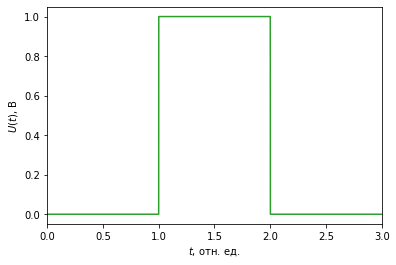

In [170]:
fig, ax = plt.subplots()
ax.plot(t, u, color='tab:green')
ax.set_xlabel("$t$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)
ax.set_xlim(0, T)

<h3>Построим спектр нашего сигнала</h3>

(-0.1, 10.0)

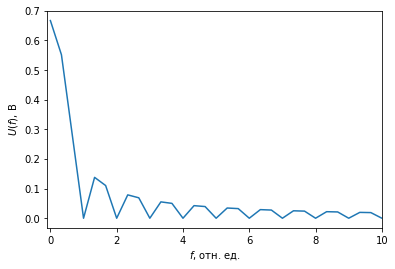

In [172]:
fig, ax = plt.subplots()
ax.plot(freq[0:n//2], (np.hypot(spec.real, spec.imag)/n*2.0)[0:n//2])
ax.set_xlabel("$f$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.set_xlim(-0.1, 10)

<h3>Проведем рассчет сигнала через фильтр с параметрами 3/tau, 1/tau и 0.5/tau</h3>

In [174]:
sig_lf1 = filter(t, u, 0, 3/tau)
sig_lf2 = filter(t, u, 0, 1/tau)
sig_lf3 = filter(t, u, 0, 0.5/tau)

<h3>Вычислим БПФ</h3>

In [175]:
spec_lf1 = np.fft.fft(sig_lf1)
spec_lf2 = np.fft.fft(sig_lf2)
spec_lf3 = np.fft.fft(sig_lf3)

<h3>Построим сигнал, прошедший через каждый фильтр</h3>

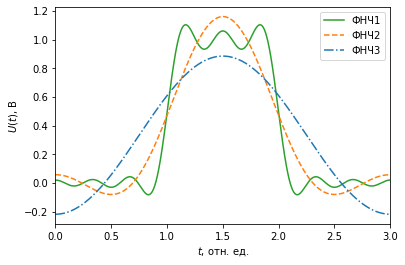

In [179]:
fig, ax = plt.subplots()
ax.plot(t,sig_lf1.real, color='tab:green',label='ФНЧ1')
ax.plot(t,sig_lf2.real,'--', color='tab:orange',label='ФНЧ2')
ax.plot(t,sig_lf3.real,'-.', color='tab:blue',label='ФНЧ3')
ax.set_xlabel("$t$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)
ax.set_xlim(0, T)
ax.legend(loc='best')

<h3>Построим спектры сигналов, прошедших через фильтры</h3>

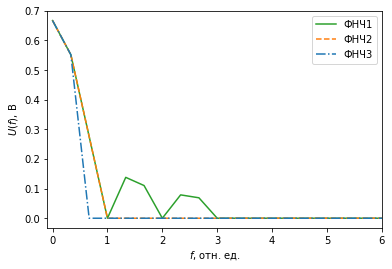

In [180]:
fig, ax = plt.subplots()
ax.plot(freq[0:n//2], (np.hypot(spec_lf1.real, spec_lf1.imag)/n*2.0)[0:n//2],color='tab:green',label='ФНЧ1' )
ax.plot(freq[0:n//2], (np.hypot(spec_lf2.real, spec_lf2.imag)/n*2.0)[0:n//2],'--',color='tab:orange',label='ФНЧ2')
ax.plot(freq[0:n//2], (np.hypot(spec_lf3.real, spec_lf3.imag)/n*2.0)[0:n//2],'-.',color='tab:blue',label='ФНЧ3')
ax.set_xlabel("$f$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.set_xlim(-0.1, 6)
ax.legend(loc='best')

<h3>Проведем рассчет сигнала через ФВЧ и спектра через БПФ</h3>

In [181]:
sig_hf = filter(t, u,0.5/tau,6)
spec_lf1 = np.fft.fft(sig_hf)

<h3>Построим сигнал, прошедший через ФВЧ</h3>

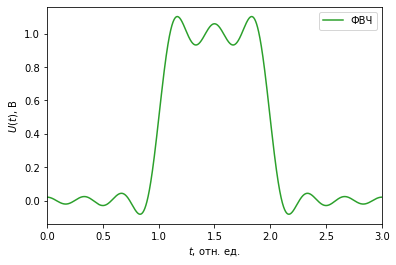

In [188]:
fig, ax = plt.subplots()
ax.plot(t,sig_lf1.real, color='tab:green',label='ФВЧ')
ax.set_xlabel("$t$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)
ax.set_xlim(0, T)
ax.legend(loc='best')

<h3>Построим спектр сигнала</h3>

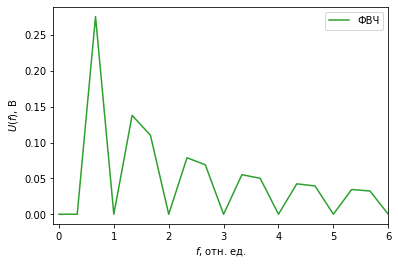

In [187]:
fig, ax = plt.subplots()
ax.plot(freq[0:n//2], (np.hypot(spec_lf1.real, spec_lf1.imag)/n*2.0)[0:n//2], color='tab:green',label='ФВЧ' )
ax.set_xlabel("$f$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.set_xlim(-0.1, 6)
ax.legend(loc='best')